## Limpieza de datos

In [1]:
# Importar las librerías a usar
import pandas as pd
import seaborn as sns

In [2]:
#Cargar el archivo CSV
data = pd.read_csv("SeoulBikeData_utf8.csv")

In [3]:
#Eliminar la columna de fechas ya que no es relevante
data.head()
data = data.drop('Date', axis=1)
data

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
#Crear una copia del DF por si algo
datacopy = data

In [6]:
#Comprobar los valores que toma la columna Seasons
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [7]:
#Revisar que no existan duplicados en el DF
duplicates = len(data[data.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 0


In [8]:
#Revisar que no existan valores faltantes
missing_values = data.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 0


In [9]:
# Tipos de datos en el dataset
types = data.dtypes.value_counts()

print('Number of Features: %d'%(data.shape[1]))
print('Number of Customers: %d'%(data.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 13
Number of Customers: 8760
Data Types and Frequency in Dataset:
float64    6
int64      4
object     3
Name: count, dtype: int64


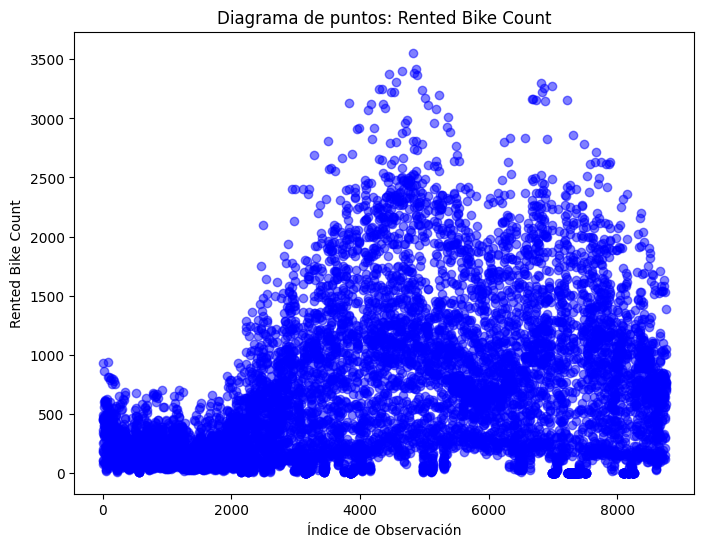

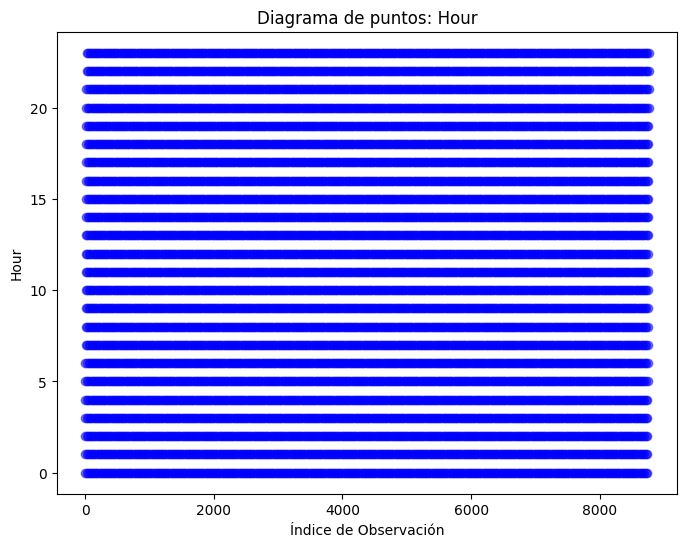

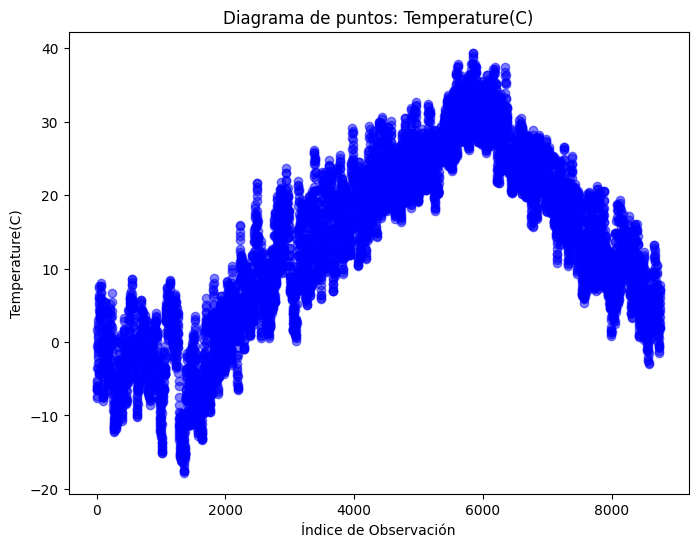

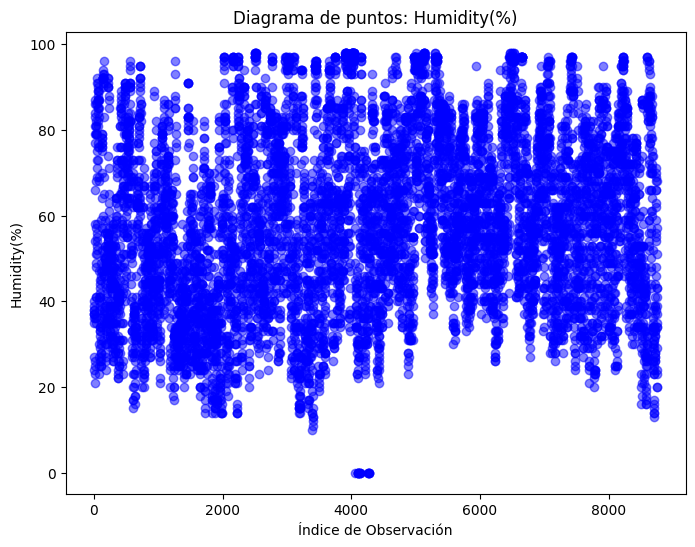

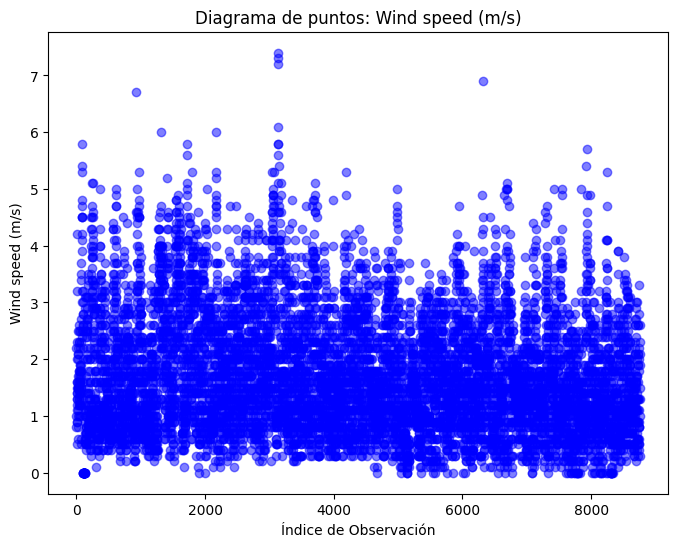

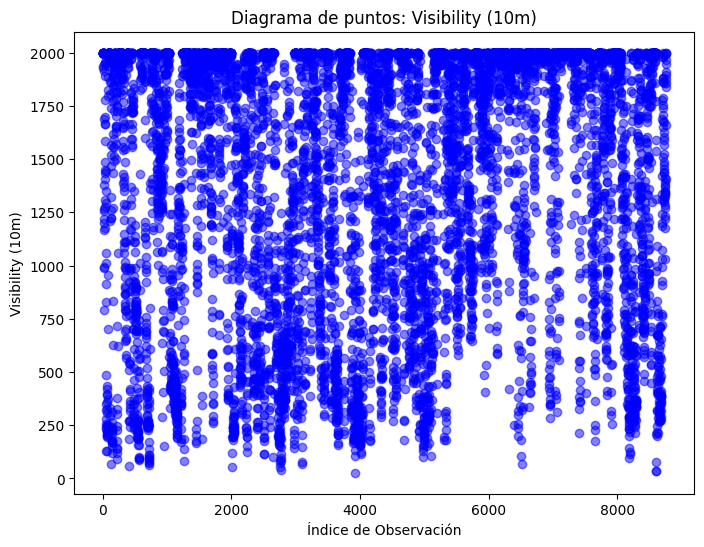

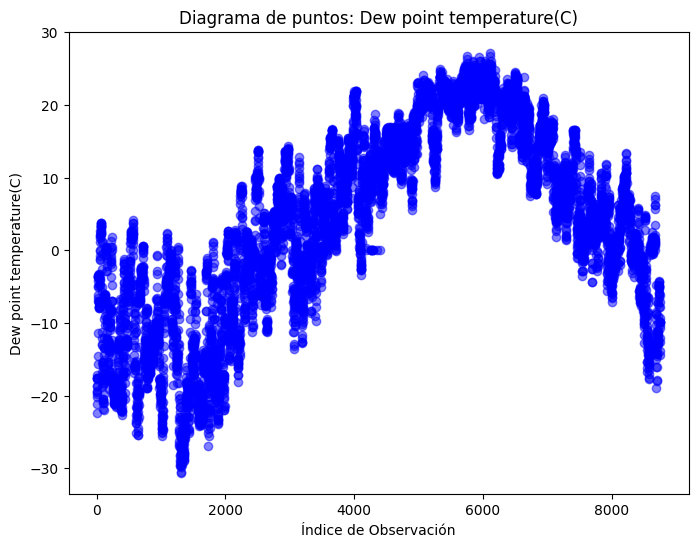

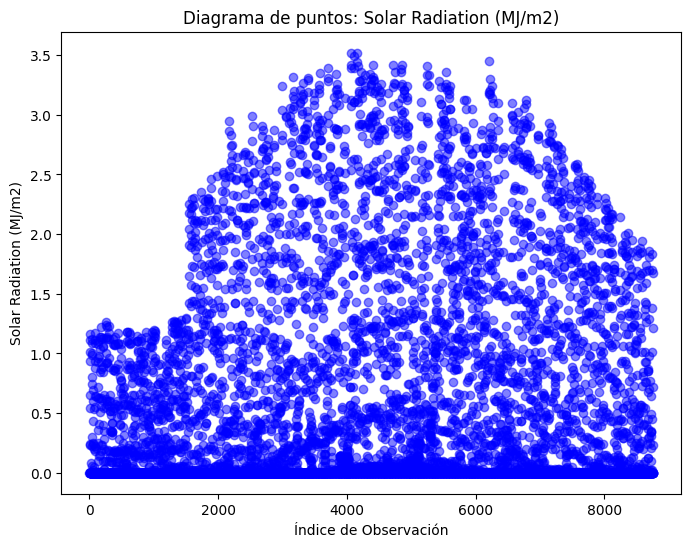

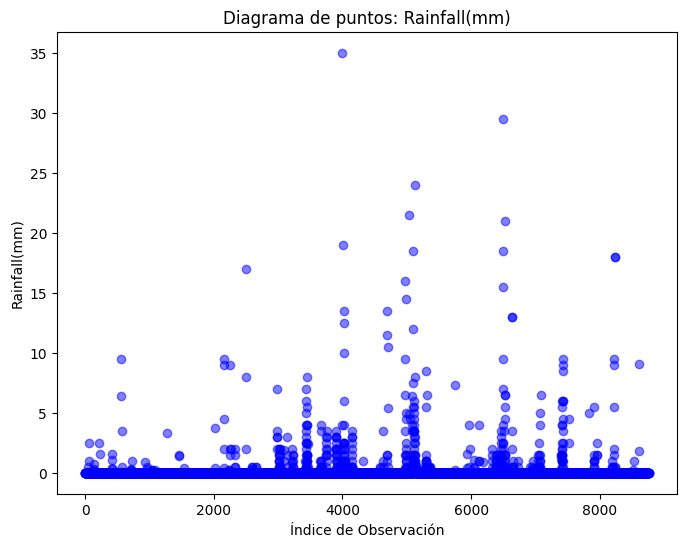

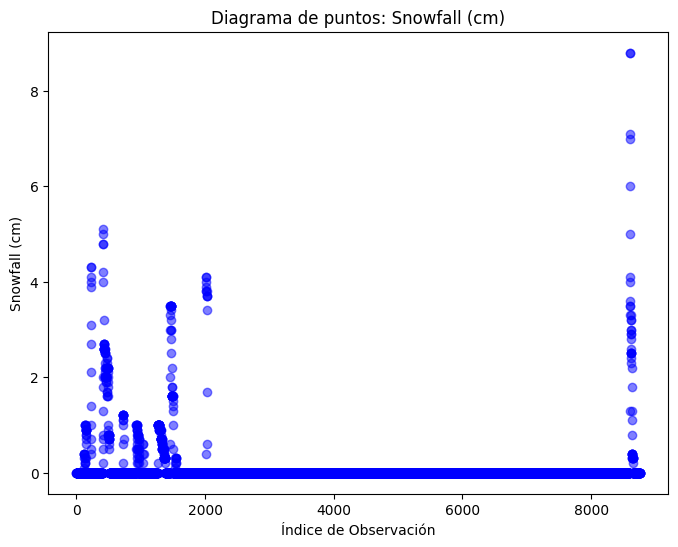

In [10]:
import matplotlib.pyplot as plt

numeric_variables = data.select_dtypes(include=['float64', 'int64'])

# Generar diagrama de puntos para cada variable numérica
for column in numeric_variables.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data.index, data[column], alpha=0.5, color='blue')
    plt.title(f'Diagrama de puntos: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

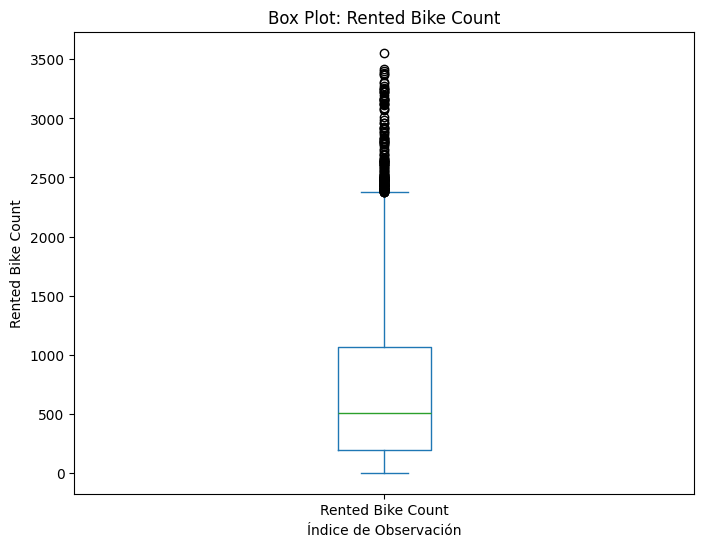

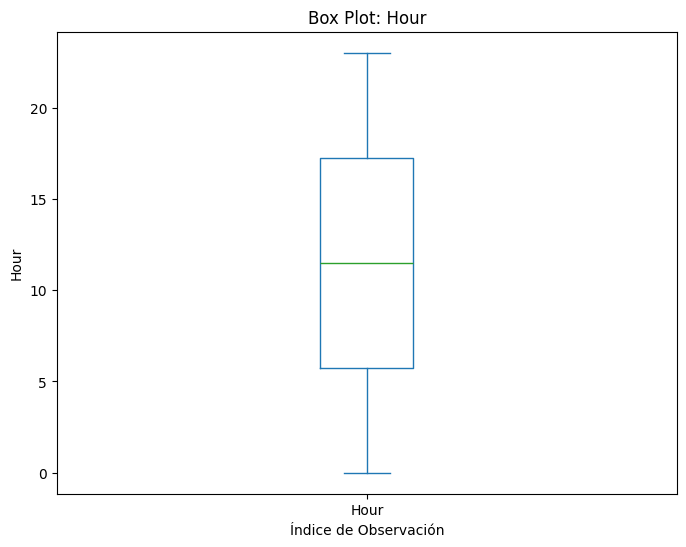

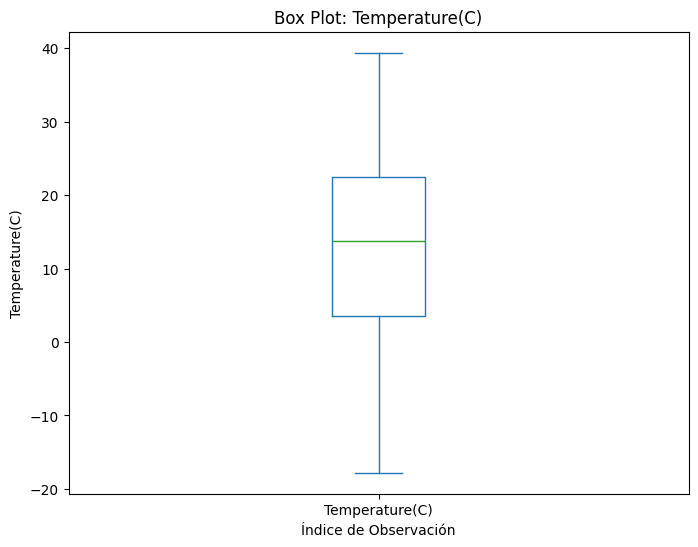

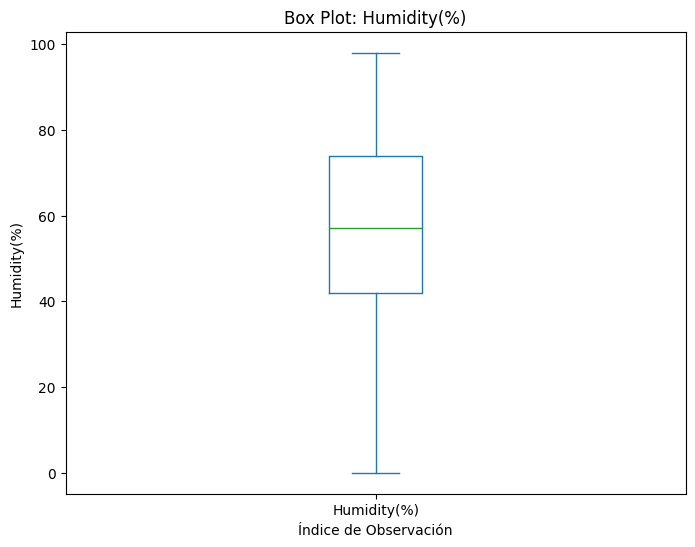

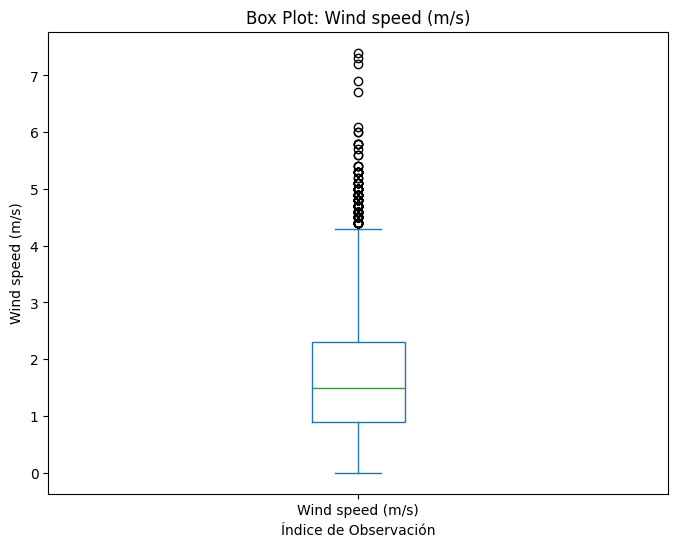

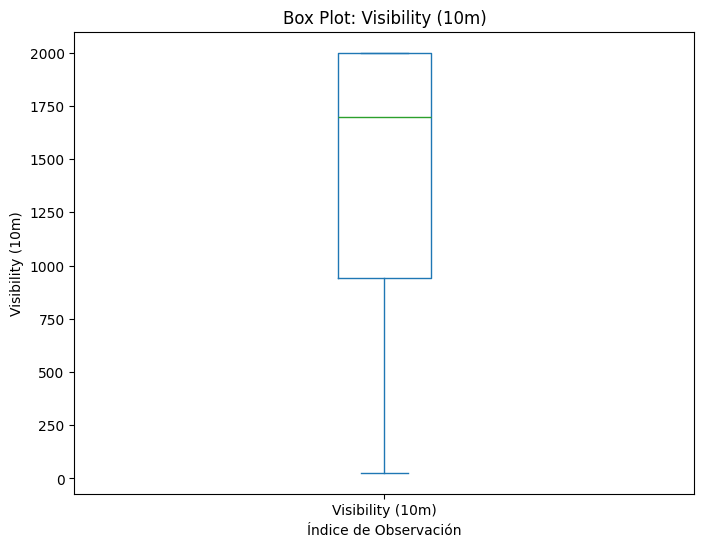

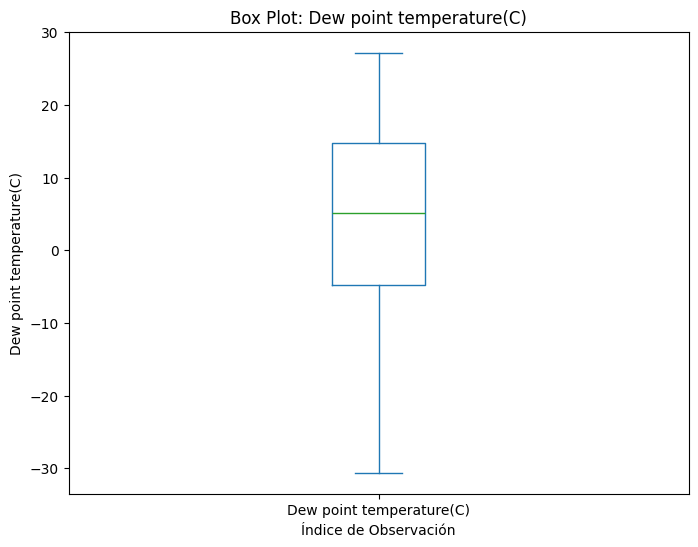

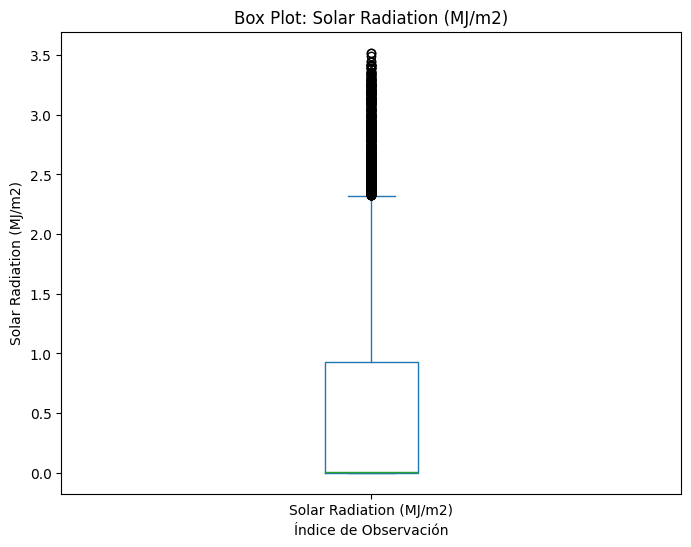

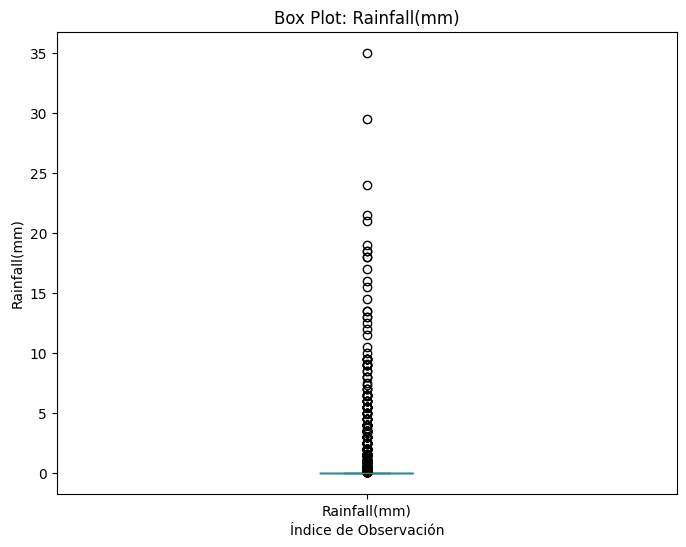

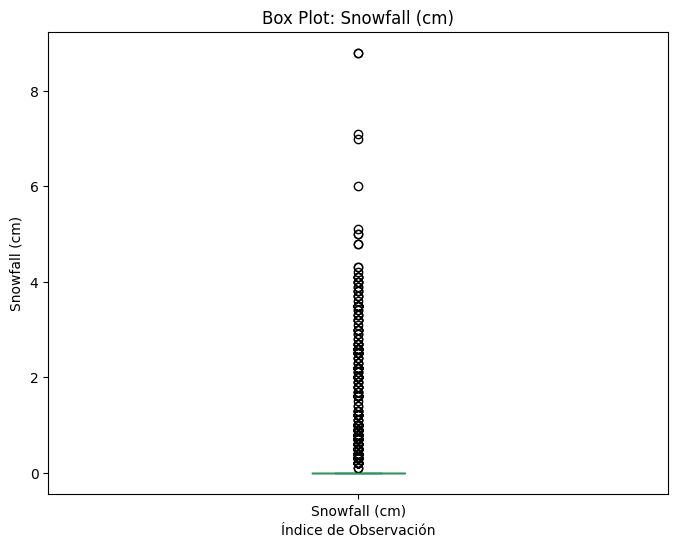

In [11]:
#Generar boxplot para cada variable númerica
for column in numeric_variables.columns:
    plt.figure(figsize=(8, 6))
    data[column].plot(kind='box')
    plt.title(f'Box Plot: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

In [12]:
data_numerico = data.select_dtypes(include=['float64', 'int64'])

#Ver datos en el rango intercuartil
Q1 = data_numerico.quantile(0.25)
Q3 = data_numerico.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers para ver datos atipicos
outliers = ((data_numerico < (Q1 - 1.5 * IQR)) | (data_numerico > (Q3 + 1.5 * IQR)))

print(outliers)


      Rented Bike Count   Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                 False  False           False        False             False   
1                 False  False           False        False             False   
2                 False  False           False        False             False   
3                 False  False           False        False             False   
4                 False  False           False        False             False   
...                 ...    ...             ...          ...               ...   
8755              False  False           False        False             False   
8756              False  False           False        False             False   
8757              False  False           False        False             False   
8758              False  False           False        False             False   
8759              False  False           False        False             False   

      Visibility (10m)  Dew

In [13]:
#Ver cantidad de datos atipicos por columna
print(outliers.sum())

Rented Bike Count           158
Hour                          0
Temperature(C)                0
Humidity(%)                   0
Wind speed (m/s)            161
Visibility (10m)              0
Dew point temperature(C)      0
Solar Radiation (MJ/m2)     641
Rainfall(mm)                528
Snowfall (cm)               443
dtype: int64


In [14]:
#Crear un DF sin datos atipicos
df_cleaned = data[(outliers == False).all(axis=1)]
print(df_cleaned)

      Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0            -5.2           37               2.2   
1                   204     1            -5.5           38               0.8   
2                   173     2            -6.0           39               1.0   
3                   107     3            -6.2           40               0.9   
4                    78     4            -6.0           36               2.3   
...                 ...   ...             ...          ...               ...   
8755               1003    19             4.2           34               2.6   
8756                764    20             3.4           37               2.3   
8757                694    21             2.6           39               0.3   
8758                712    22             2.1           41               1.0   
8759                584    23             1.9           43               1.3   

      Visibility (10m)  Dew point tempe

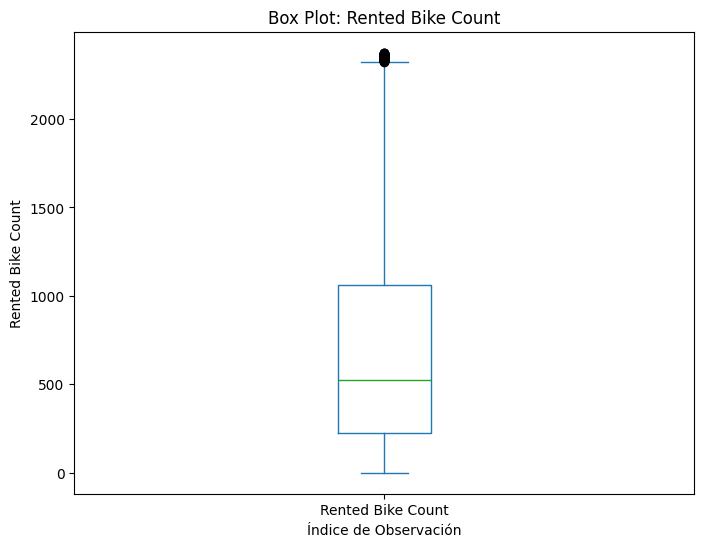

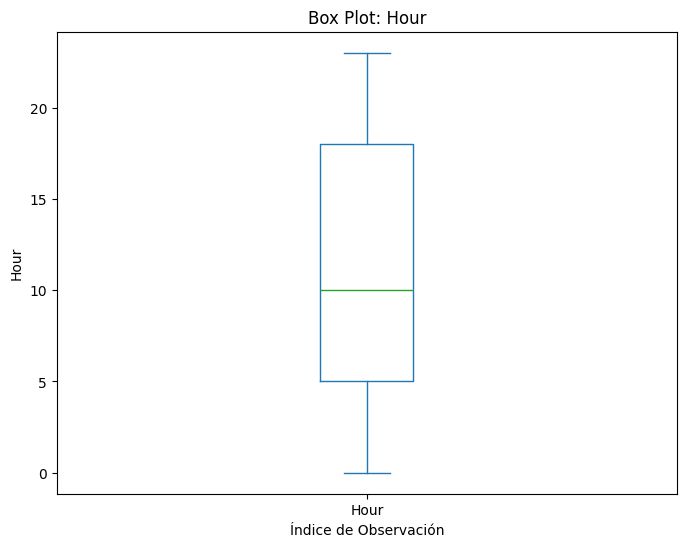

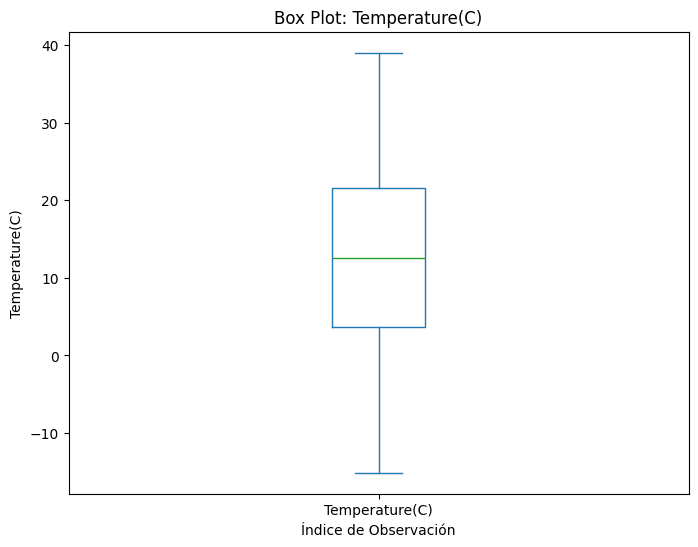

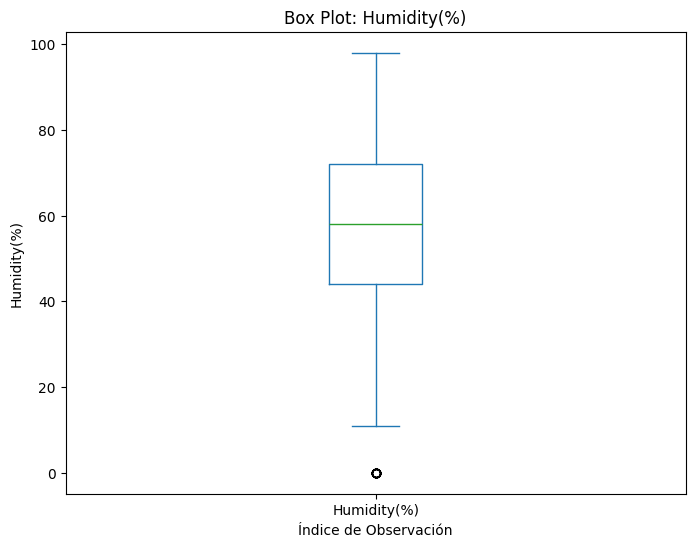

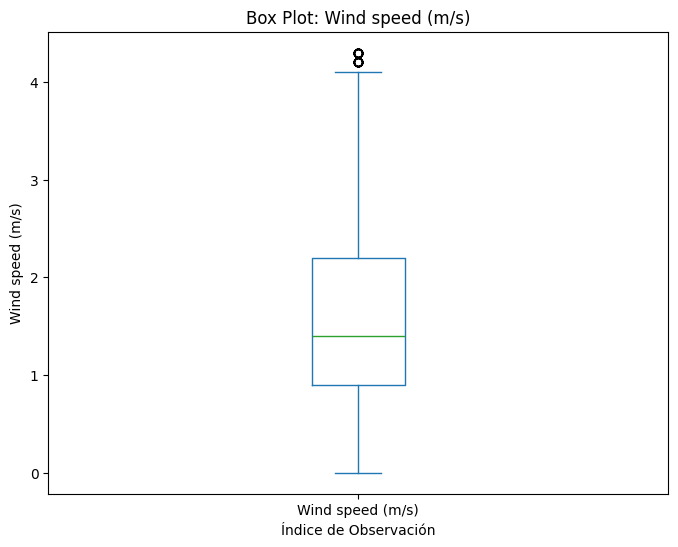

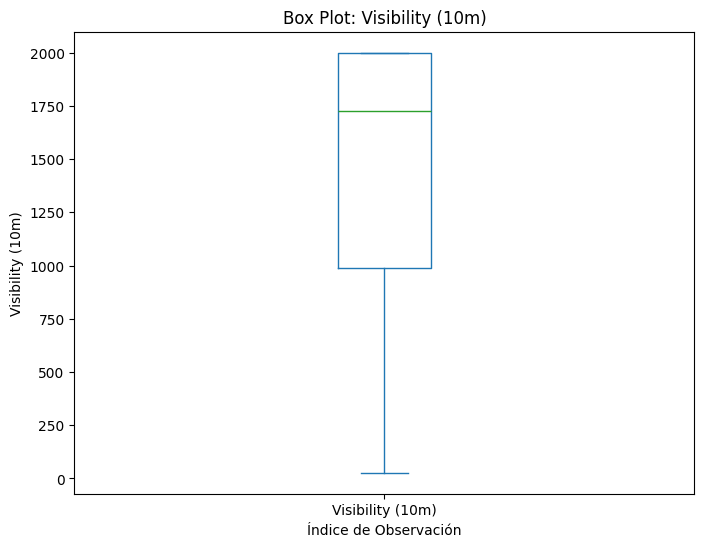

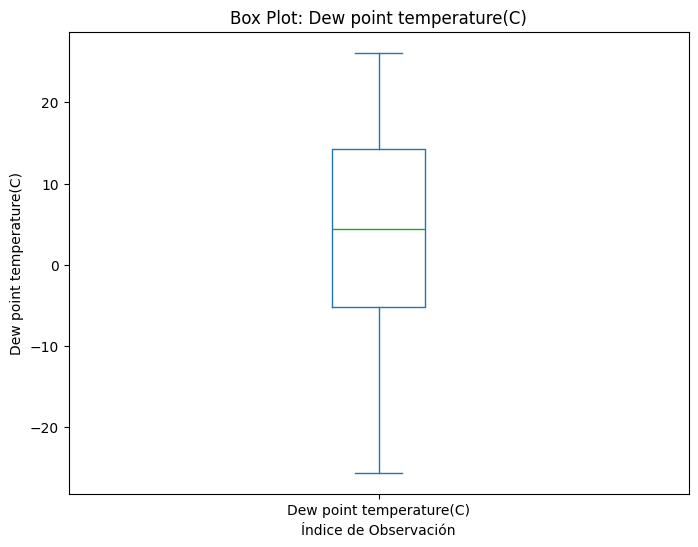

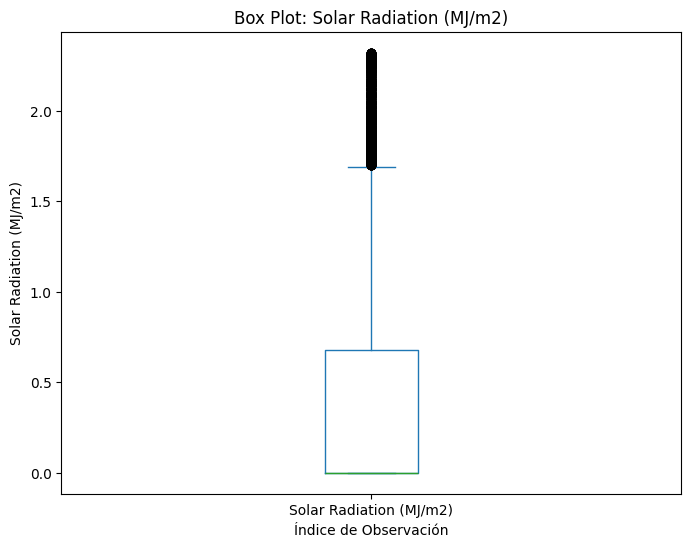

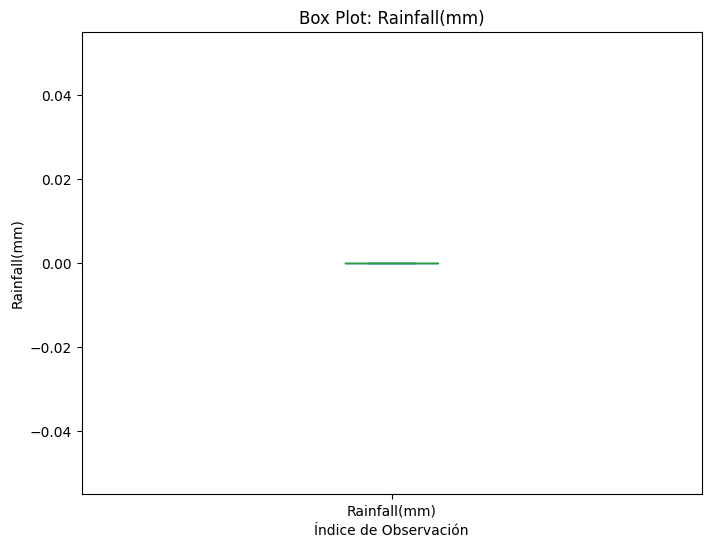

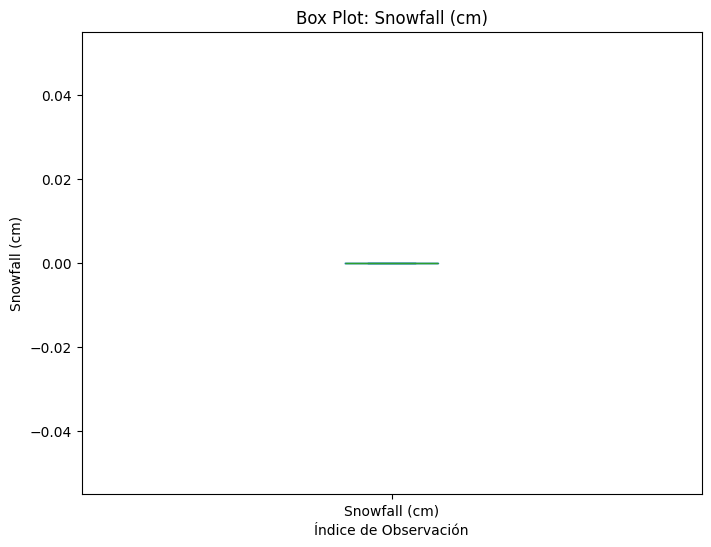

In [15]:
#Boxplot del df sin variables atipicas
for column in numeric_variables.columns:
    plt.figure(figsize=(8, 6))
    df_cleaned[column].plot(kind='box')
    plt.title(f'Box Plot: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

In [16]:
#Convertir las variables str en variables dummie
catcols = data.select_dtypes(exclude = ['int64','float64']).columns
 
data_dummie_Completa = pd.get_dummies(data, columns = catcols)
data_dummie_Sin_Atipicos = pd.get_dummies(df_cleaned, columns = catcols)